# Loan Prediction Excercise

## 1. Load packages

In [1]:
import pandas as pd
import numpy as np
import os 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## 2. Load data

In [2]:
train = pd.read_csv('train_ctrUa4K.csv')

In [3]:
test = pd.read_csv('test_lAUu6dG.csv')

In [4]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [6]:
train_original = train.copy()

In [7]:
test_original = test.copy()

## 3. Understanding the data 

In [8]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [9]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [10]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [11]:
test.shape

(367, 12)

In [12]:
train.shape

(614, 13)

## 4. Univariate analysis

### 4.1 Visualising the dependent variable

In [13]:
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<AxesSubplot:>

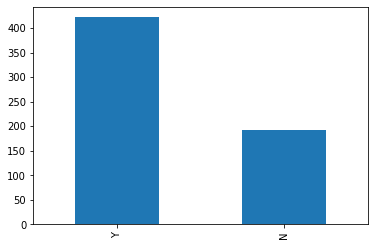

In [14]:
train['Loan_Status'].value_counts().plot.bar()

### 4.2 Visualising the independent variables

#### 4.2.1 Categorical variables
Gender	Married	Education	Self_Employed	Loan_Status

<AxesSubplot:title={'center':'Self_Employed'}>

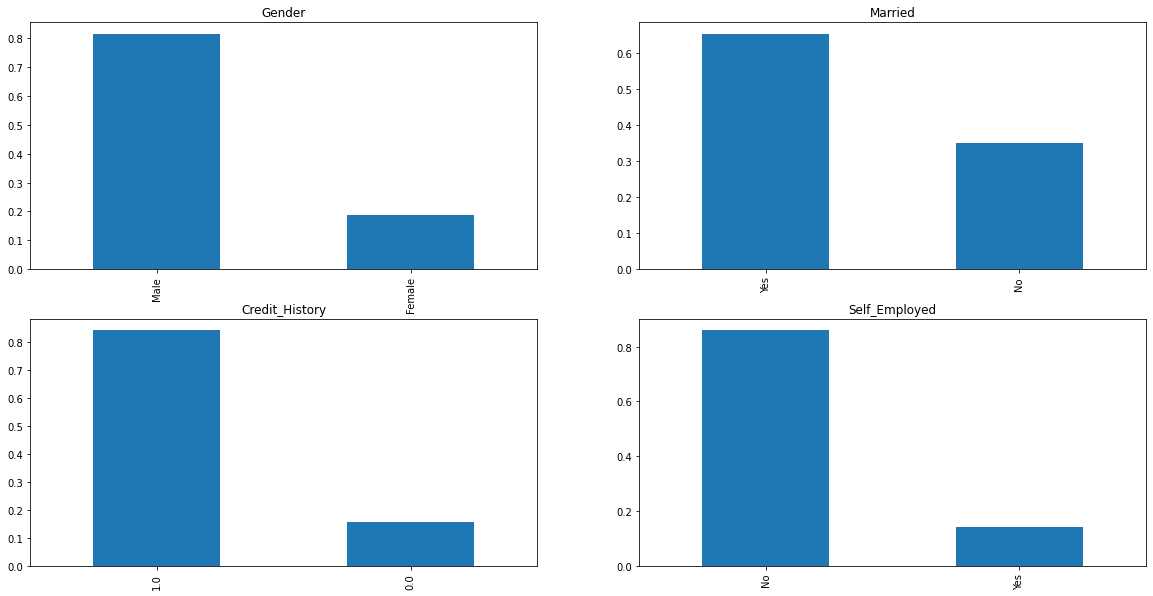

In [15]:
plt.figure(1)
plt.subplot(221)
train["Gender"].value_counts(normalize=True).plot.bar(figsize=(20,10), title="Gender")

plt.subplot(222)
train["Married"].value_counts(normalize=True).plot.bar(title="Married")

plt.subplot(223)
train["Credit_History"].value_counts(normalize=True).plot.bar(title="Credit_History")

plt.subplot(224)
train["Self_Employed"].value_counts(normalize=True).plot.bar(title="Self_Employed")


#### 4.2.2 Ordinal variables
Dependent Education Property_Area

<AxesSubplot:title={'center':'Property_Area'}>

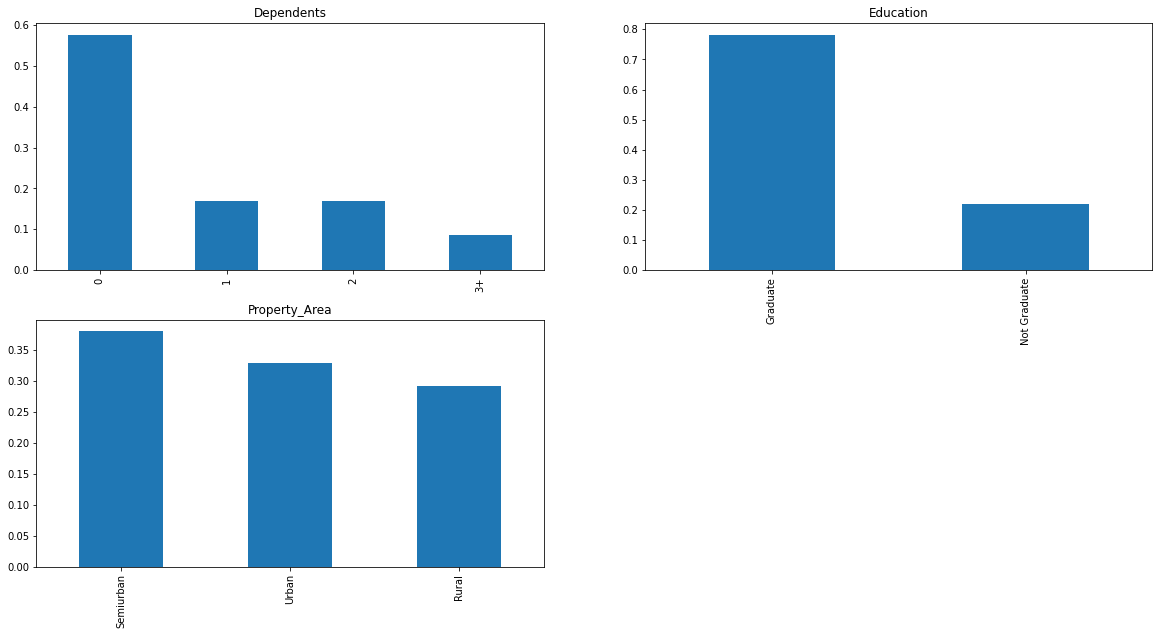

In [16]:
plt.figure(1)
plt.subplot(221)
train["Dependents"].value_counts(normalize=True).plot.bar(figsize=(20,10), title="Dependents")

plt.subplot(222)
train["Education"].value_counts(normalize=True).plot.bar(title="Education")

plt.subplot(223)
train["Property_Area"].value_counts(normalize=True).plot.bar(title="Property_Area")


#### 4.2.3 Numerical variables
ApplicantIncome CoapplilcantIncome LoanAmount 

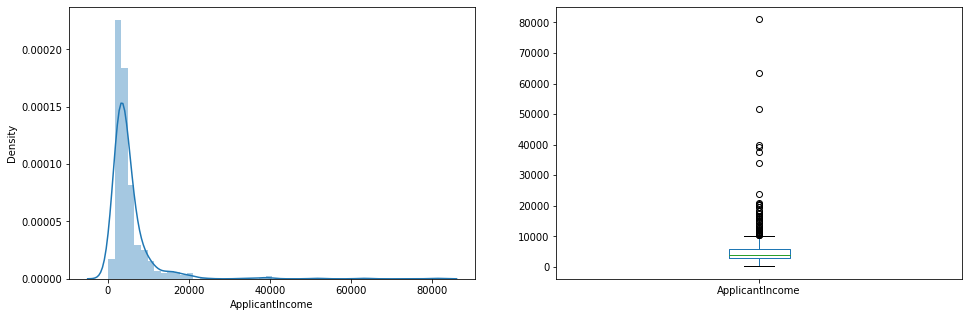

In [17]:
plt.figure(1)
plt.subplot(121) 
sns.distplot(train['ApplicantIncome']);
plt.subplot(122) 
train['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()

Text(0.5, 0.98, '')

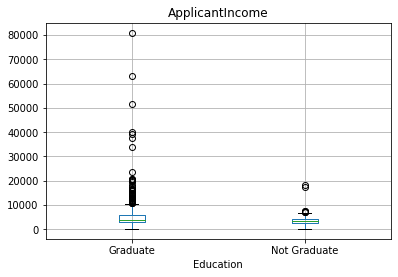

In [18]:
#split by Education
train.boxplot(column="ApplicantIncome", by="Education")
plt.suptitle("")


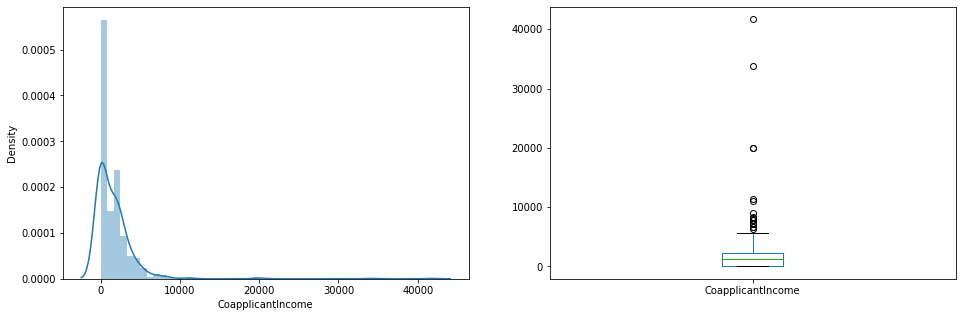

In [19]:
plt.figure(1)
plt.subplot(121) 
sns.distplot(train['CoapplicantIncome']);
plt.subplot(122) 
train['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()

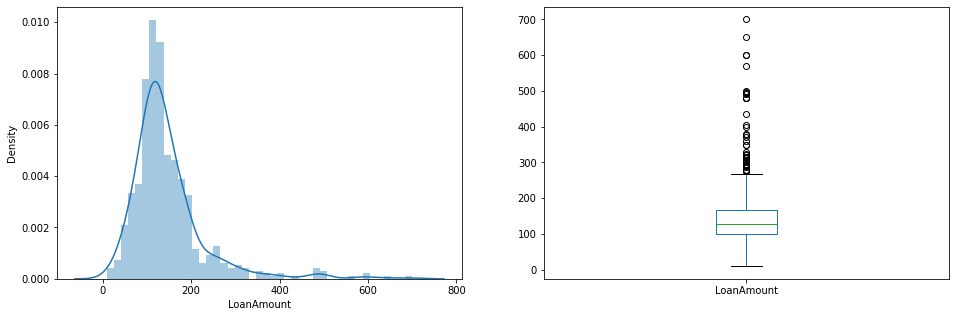

In [20]:
plt.figure(1)
plt.subplot(121) 
sns.distplot(train['LoanAmount']);
plt.subplot(122) 
train['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

## 5. Bivariate analysis

### 5.1 Categorical independent vs Target variable

In [24]:
Gender = pd.crosstab(train['Gender'], train['Loan_Status'])

In [23]:
Gender

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


In [34]:
Gender.div(Gender.sum(1).astype(float),axis=0)

Loan_Status,N,Y
Gender,,
Female,0.330357,0.669643
Male,0.306748,0.693252


<AxesSubplot:xlabel='Gender'>

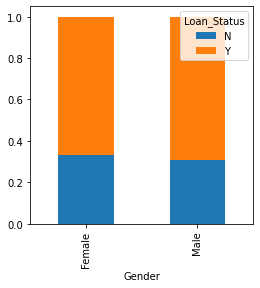

In [35]:
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True, figsize=(4,4))

In [38]:
cat_vars = train[['Married','Dependents','Education','Self_Employed']]

In [39]:
cat_vars.head()

,Married,Dependents,Education,Self_Employed
0,No,0,Graduate,No
1,Yes,1,Graduate,No
2,Yes,0,Graduate,Yes
3,Yes,0,Not Graduate,No
4,No,0,Graduate,No


Married
Dependents
Education
Self_Employed
Credit_History
Property_Area


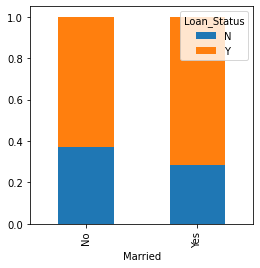

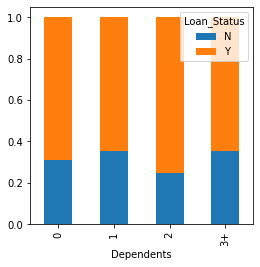

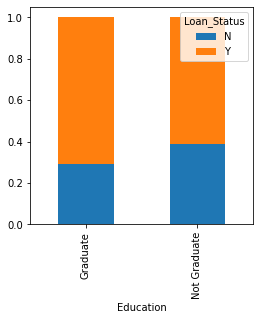

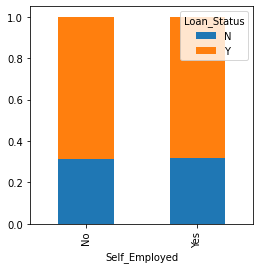

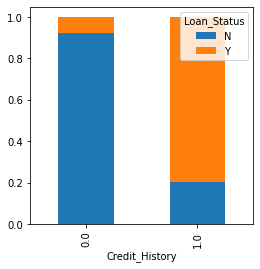

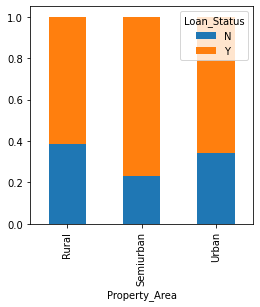

In [52]:
for iteration, col in enumerate(train[['Married','Dependents','Education','Self_Employed','Credit_History','Property_Area']]):
    print(col)
    values = train[col]
    var = pd.crosstab(values,train['Loan_Status'])
    var.div(var.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True, figsize=(4,4))


### 5.2 Numerical variables vs Target Variable

<AxesSubplot:xlabel='Loan_Status'>

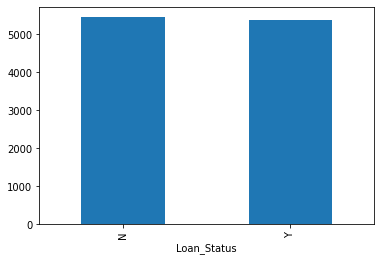

In [54]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

In [58]:
bins=[0,2500,4000,6000,81000] 
group = ['Low','Average','High','Very high']
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)

Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status'])

In [59]:
Income_bin

Loan_Status,N,Y
Income_bin,,
Low,34,74
Average,67,159
High,45,98
Very high,46,91


In [61]:
def check_stacked(cat,dep):
    var = pd.crosstab(cat,dep)
    var.div(var.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
    plt.xlabel(cat.name)
    plt.ylabel('Percentage')


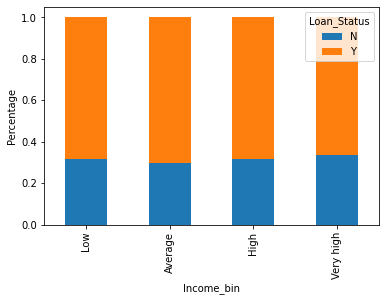

In [62]:
check_stacked(train['Income_bin'],train['Loan_Status'])

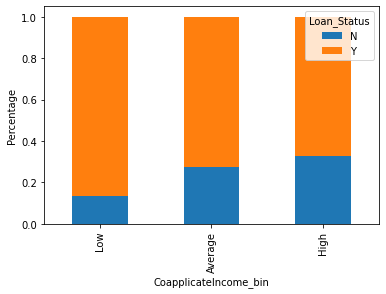

In [66]:
bins=[0,1000,3000,42000] 
group = ['Low','Average','High']
train['CoapplicateIncome_bin']=pd.cut(train['CoapplicantIncome'],bins,labels=group)

check_stacked(train['CoapplicateIncome_bin'],train['Loan_Status'])

In [67]:
train['Total_Income']=train['CoapplicantIncome']+train['ApplicantIncome']

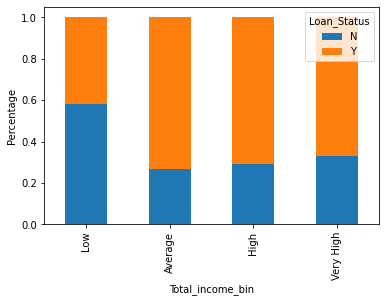

In [69]:
bins=[0,2500,4000,6000,81000] 
group = ['Low','Average','High','Very High']
train['Total_income_bin']=pd.cut(train['Total_Income'],bins,labels=group)

check_stacked(train['Total_income_bin'],train['Loan_Status'])

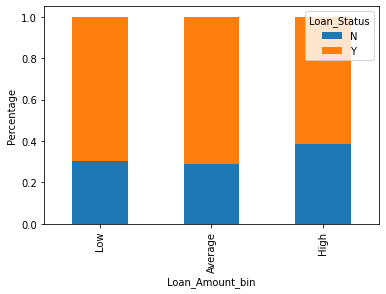

In [71]:
bins=[0,100,200,700] 
group = ['Low','Average','High']
train['Loan_Amount_bin']=pd.cut(train['LoanAmount'],bins,labels=group)

check_stacked(train['Loan_Amount_bin'],train['Loan_Status'])

In [1]:
### drop the bins and change some categorical in numerical so we can check correlation 

In [73]:
train = train.drop(['Income_bin','CoapplicateIncome_bin','Loan_Amount_bin','Total_income_bin','Total_Income'], axis=1) 

In [74]:
train['Dependents'].replace('3+',3,inplace=True)
test['Dependents'].replace('3+',3,inplace=True)

train['Loan_Status'].replace('N',0,inplace=True)
train['Loan_Status'].replace('Y',1,inplace=True)

<AxesSubplot:>

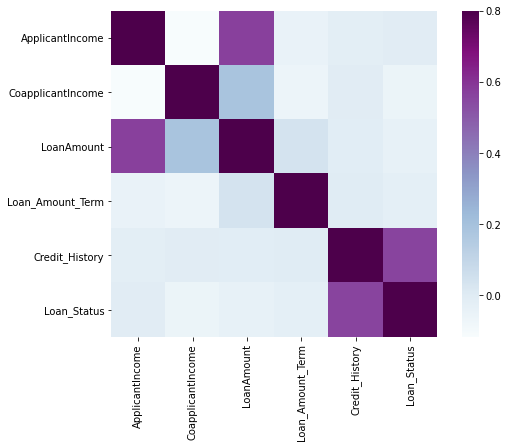

In [81]:
matrix=train.corr()
matrix
ax = plt.subplots(figsize=(9,6)) 
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu")